# Table of Contents
#### 01 Importing Libraries and Data
#### 02 Comparing Customer Behavior in Different Geographic Areas
#### 03 Excluding the Low-Activity Customers
#### 04 Customer Profiling
#### 05 Visualizing Customer Profiles
#### 06 Customer Profile Analysis
#### 07 Analysis by Region
#### 08 Ordering Habits Analysis
#### 09 Exports

# 01 Importing Libraries and Data

In [1]:
# import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path = r'/Users/Dena/Instacart Basket Analysis'

In [3]:
# import the new merged data (orders, products, and customers)
df = pd.read_pickle(os.path.join(path, '02 Data','Prepared Data', 'orders_products_customers_2.pkl'))

In [4]:
# check the output
df.head(10)

,order_id,user_id,number_of_orders_by_user,orders_day_of_week,order_hour_of_day,days_since_prior_order,is_first_order,product_id,add_to_cart_order,reordered,...,first_name,last_name,gender,state,age,date_joined,number_of_dependents,marital_status,income,_merge
0,2539329,1,1,2,8,NaN,Yes,196,1,0,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
1,2398795,1,2,3,7,15.0,No,196,1,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
2,473747,1,3,3,12,21.0,No,196,1,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
3,2254736,1,4,4,7,29.0,No,196,1,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
4,431534,1,5,4,15,28.0,No,196,1,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
5,3367565,1,6,2,7,19.0,No,196,1,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
6,550135,1,7,1,9,20.0,No,196,1,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
7,3108588,1,8,1,14,14.0,No,196,2,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
8,2295261,1,9,1,16,0.0,No,196,4,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
9,2550362,1,10,4,8,30.0,No,196,1,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both


In [5]:
df.tail(10)

,order_id,user_id,number_of_orders_by_user,orders_day_of_week,order_hour_of_day,days_since_prior_order,is_first_order,product_id,add_to_cart_order,reordered,...,first_name,last_name,gender,state,age,date_joined,number_of_dependents,marital_status,income,_merge
32404849,1539810,106143,21,1,18,5.0,No,19675,1,1,...,Gerald,Yates,Male,Hawaii,25,5/26/2017,0,single,53755,both
32404850,3308056,106143,22,4,20,10.0,No,19675,1,1,...,Gerald,Yates,Male,Hawaii,25,5/26/2017,0,single,53755,both
32404851,2988973,106143,23,2,22,5.0,No,19675,1,1,...,Gerald,Yates,Male,Hawaii,25,5/26/2017,0,single,53755,both
32404852,930,106143,24,6,12,4.0,No,19675,1,1,...,Gerald,Yates,Male,Hawaii,25,5/26/2017,0,single,53755,both
32404853,467253,106143,25,6,16,7.0,No,19675,1,1,...,Gerald,Yates,Male,Hawaii,25,5/26/2017,0,single,53755,both
32404854,156685,106143,26,4,23,5.0,No,19675,1,1,...,Gerald,Yates,Male,Hawaii,25,5/26/2017,0,single,53755,both
32404855,484769,66343,1,6,11,NaN,Yes,47210,1,0,...,Jacqueline,Arroyo,Female,Tennessee,22,9/12/2017,3,married,46151,both
32404856,1561557,66343,2,1,11,30.0,No,47210,1,1,...,Jacqueline,Arroyo,Female,Tennessee,22,9/12/2017,3,married,46151,both
32404857,276317,66343,3,6,15,19.0,No,47210,1,1,...,Jacqueline,Arroyo,Female,Tennessee,22,9/12/2017,3,married,46151,both
32404858,2922475,66343,4,1,12,30.0,No,47210,1,1,...,Jacqueline,Arroyo,Female,Tennessee,22,9/12/2017,3,married,46151,both


In [6]:
# check the shape
df.shape

(32404859, 34)

There is some personally identifiable information (PII) in this data frame, specifically the first and last names of the customers. Since these names are not necessary for my analysis, I will drop these columns.

In [7]:
# drop the columns with PII
df.drop(columns=['first_name', 'last_name'], axis = 1, inplace = True)

In [8]:
# check the new shape
df.shape

(32404859, 32)

In [9]:
# check the output
df.head(10)

,order_id,user_id,number_of_orders_by_user,orders_day_of_week,order_hour_of_day,days_since_prior_order,is_first_order,product_id,add_to_cart_order,reordered,...,median_of_days_since_prior_order,regularity_flag,gender,state,age,date_joined,number_of_dependents,marital_status,income,_merge
0,2539329,1,1,2,8,NaN,Yes,196,1,0,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both
1,2398795,1,2,3,7,15.0,No,196,1,1,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both
2,473747,1,3,3,12,21.0,No,196,1,1,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both
3,2254736,1,4,4,7,29.0,No,196,1,1,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both
4,431534,1,5,4,15,28.0,No,196,1,1,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both
5,3367565,1,6,2,7,19.0,No,196,1,1,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both
6,550135,1,7,1,9,20.0,No,196,1,1,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both
7,3108588,1,8,1,14,14.0,No,196,2,1,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both
8,2295261,1,9,1,16,0.0,No,196,4,1,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both
9,2550362,1,10,4,8,30.0,No,196,1,1,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both


# 02 Comparing Customer Behavior in Different Geographic Areas

The Instacart officers are interested in comparing customer behavior in different geographic areas. I will create a regional segmentation of the data, based on the 4 regions in the following Wikipedia article: https://simple.wikipedia.org/wiki/List_of_regions_of_the_United_States

Then I will determine whether there’s a difference in spending habits between the different U.S. regions.

In [10]:
# create a new column 'region' based on the 'state' column

# Northeast
df.loc[df['state'].isin(['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']) , 'region'] ='Northeast'

In [11]:
# Midwest
df.loc[df['state'].isin(['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']) , 'region'] = 'Midwest'

In [12]:
# South
df.loc[df['state'].isin(['Delaware','Maryland','District of Columbia','Virginia','West Virginia','North Carolina','South Carolina','Georgia','Florida','Kentucky','Tennessee','Mississippi','Alabama','Oklahoma','Texas','Arkansas','Louisiana']) , 'region'] = 'South'

In [13]:
# West
df.loc[df['state'].isin(['Idaho','Montana','Wyoming','Nevada','Utah','Colorado','Arizona','New Mexico','Alaska','Washington','Oregon','California','Hawaii']) , 'region'] = 'West'

In [14]:
# check the output
df.tail(40)

,order_id,user_id,number_of_orders_by_user,orders_day_of_week,order_hour_of_day,days_since_prior_order,is_first_order,product_id,add_to_cart_order,reordered,...,regularity_flag,gender,state,age,date_joined,number_of_dependents,marital_status,income,_merge,region
32404819,968657,120516,1,2,9,NaN,Yes,8566,1,0,...,Regular customer,Male,Arizona,19,6/14/2019,0,single,76190,both,West
32404820,1715304,120516,2,4,14,16.0,No,8566,1,1,...,Regular customer,Male,Arizona,19,6/14/2019,0,single,76190,both,West
32404821,2830894,120516,3,5,8,22.0,No,8566,1,1,...,Regular customer,Male,Arizona,19,6/14/2019,0,single,76190,both,West
32404822,3054027,120516,4,5,8,0.0,No,8566,1,1,...,Regular customer,Male,Arizona,19,6/14/2019,0,single,76190,both,West
32404823,392551,120516,5,5,13,30.0,No,8566,1,1,...,Regular customer,Male,Arizona,19,6/14/2019,0,single,76190,both,West
32404824,3324220,120516,6,2,16,11.0,No,40072,1,0,...,Regular customer,Male,Arizona,19,6/14/2019,0,single,76190,both,West
32404825,3215764,120516,7,2,9,21.0,No,40072,1,1,...,Regular customer,Male,Arizona,19,6/14/2019,0,single,76190,both,West
32404826,1600476,166751,1,5,11,NaN,Yes,49001,1,0,...,Frequent customer,Female,Oregon,38,8/17/2018,1,married,41766,both,West
32404827,1972276,166751,2,4,7,20.0,No,49001,1,1,...,Frequent customer,Female,Oregon,38,8/17/2018,1,married,41766,both,West
32404828,1947537,166751,3,4,7,0.0,No,49001,1,1,...,Frequent customer,Female,Oregon,38,8/17/2018,1,married,41766,both,West


In [15]:
# check the value counts
df['region'].value_counts(dropna = False)

South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: region, dtype: int64

In [16]:
# Determine whether there’s a difference in spending habits

# find a column to compare the regions with
df.columns

Index(['order_id', 'user_id', 'number_of_orders_by_user', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'is_first_order',
       'product_id', 'add_to_cart_order', 'reordered', 'product_name',
       'aisle_id', 'department_id', 'prices', 'busiest_day', 'price_range_loc',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'mean_price_of_orders', 'spending_flag',
       'median_of_days_since_prior_order', 'regularity_flag', 'gender',
       'state', 'age', 'date_joined', 'number_of_dependents', 'marital_status',
       'income', '_merge', 'region'],
      dtype='object')

In [120]:
# create a data frame with only the last ocurrence of each user id, so each user id occurs only once
df1 = df.drop_duplicates(subset='user_id', keep="last")

In [121]:
# check its shape
df1.shape

(206209, 34)

In [122]:
# check the output
df1.tail(40)

,order_id,user_id,number_of_orders_by_user,orders_day_of_week,order_hour_of_day,days_since_prior_order,is_first_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,busiest_day,price_range_loc,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_price_of_orders,spending_flag,median_of_days_since_prior_order,regularity_flag,gender,state,age,date_joined,number_of_dependents,marital_status,income,_merge,region,low_activity
32404567,2046252,57001,4,1,9,30.0,No,35470,1,1,Water Mineral,115,7,2.4,Regularly busy,Low-range product,Busiest days,Most orders,4,New customer,2.400000,Low spender,30.0,Non-frequent customer,Male,Massachusetts,28,2/26/2020,3,married,33360,both,Northeast,Yes
32404577,2529944,73704,7,3,16,21.0,No,28952,2,0,Vitamin C,47,11,1.9,Regularly busy,Low-range product,Slowest days,Most orders,9,New customer,2.350000,Low spender,20.0,Regular customer,Male,District of Columbia,28,2/6/2017,2,married,31792,both,South,No
32404583,3345960,86446,6,2,13,22.0,No,35470,1,1,Water Mineral,115,7,2.4,Regularly busy,Low-range product,Regular days,Most orders,6,New customer,2.400000,Low spender,30.0,Non-frequent customer,Female,Alabama,21,11/28/2018,2,living with parents and siblings,45986,both,South,No
32404587,789930,146852,4,3,16,30.0,No,35470,1,1,Water Mineral,115,7,2.4,Regularly busy,Low-range product,Slowest days,Most orders,4,New customer,2.400000,Low spender,30.0,Non-frequent customer,Female,Nevada,59,4/17/2019,1,married,44677,both,West,Yes
32404590,54880,204940,3,6,1,30.0,No,35470,1,1,Water Mineral,115,7,2.4,Regularly busy,Low-range product,Regular days,Fewest orders,3,New customer,2.400000,Low spender,29.0,Non-frequent customer,Male,Nebraska,26,11/7/2018,0,single,31792,both,Midwest,Yes
32404611,1603097,124817,8,6,18,15.0,No,34588,1,1,Double Chocolate Soft Baked Cookies,61,19,4.0,Regularly busy,Low-range product,Regular days,Average orders,8,New customer,6.147619,Low spender,15.0,Regular customer,Female,Maine,68,9/5/2019,0,divorced/widowed,45764,both,Northeast,No
32404618,428032,105281,2,4,11,30.0,No,14517,1,0,Pasta Spaghetti,131,9,2.1,Least busy,Low-range product,Slowest days,Most orders,5,New customer,5.500000,Low spender,21.0,Non-frequent customer,Male,Kansas,30,3/22/2018,2,married,42106,both,Midwest,No
32404621,2736264,183315,3,0,22,15.0,No,15015,1,1,Lightweight Extreme Scented Cat Litter,41,8,4.7,Busiest day,Low-range product,Busiest days,Average orders,3,New customer,4.700000,Low spender,22.5,Non-frequent customer,Female,Montana,47,7/19/2017,2,married,44823,both,West,Yes
32404627,242204,115493,5,6,16,6.0,No,18308,1,1,Non Fat Dry Milk Powder,17,13,13.1,Regularly busy,Mid-range product,Regular days,Most orders,5,New customer,12.350000,High spender,1.0,Frequent customer,Female,North Dakota,49,3/18/2020,3,married,113015,both,Midwest,No
32404642,1607248,65773,5,1,12,30.0,No,34564,3,1,Home Sandwich Bags Fold & Close,85,17,3.4,Regularly busy,Low-range product,Busiest days,Most orders,5,New customer,6.800000,Low spender,30.0,Non-frequent customer,Male,Massachusetts,44,9/10/2019,3,married,54164,both,Northeast,No


In [123]:
# make sure the shape of the original data frame is unchanged
df.shape

(32404859, 34)

In [23]:
# limit number of rows displayed
pd.set_option('display.max_rows', 50)

In [124]:
# check the value counts in the 'spending_flag' column
df1['spending_flag'].value_counts(dropna = False)

Low spender     200858
High spender      5351
Name: spending_flag, dtype: int64

In [125]:
# check it adds up to the total number of users
200858 + 5351

206209

In [126]:
# cross the regions with the spending flag
pd.crosstab(df1.region, df1.spending_flag)

spending_flag,High spender,Low spender
region,,
Midwest,1260,47259
Northeast,882,35506
South,1816,66921
West,1393,51172


In [127]:
# turn this table into a data frame
df2 = pd.crosstab(df1.region, df1.spending_flag)

In [128]:
# check the output
df2.head()

spending_flag,High spender,Low spender
region,,
Midwest,1260,47259
Northeast,882,35506
South,1816,66921
West,1393,51172


In [129]:
# create a column with the ratio of high spenders to low spenders in each region
df2['high_to_low_spender_ratio'] = (df2['High spender']/df2['Low spender'])

In [130]:
# check the output
df2.head()

spending_flag,High spender,Low spender,high_to_low_spender_ratio
region,,,
Midwest,1260,47259,0.026662
Northeast,882,35506,0.024841
South,1816,66921,0.027136
West,1393,51172,0.027222


There are more customers in the South, therefore they have the largest amount of high spenders. The area that has the largest percentage of high spenders is in the Midwest, but overall the ratios are very close.

Text(0.5, 1.0, 'Number of Customers by Region')

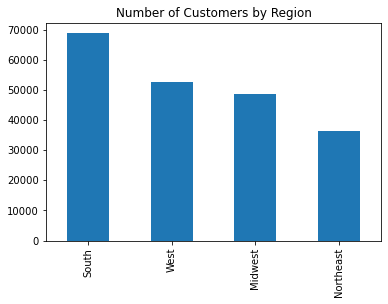

In [136]:
bar_region_count = df1['region'].value_counts().plot.bar()
plt.title('Number of Customers by Region')

Text(0.5, 1.0, 'Ratio of High to Low Spenders by Region')

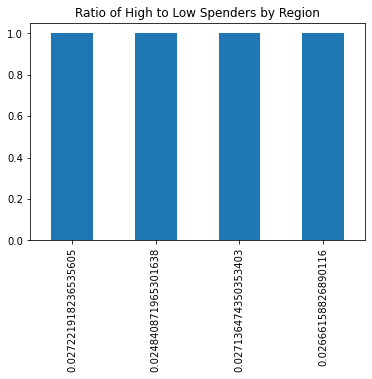

In [135]:
bar_ratio = df2['high_to_low_spender_ratio'].value_counts().plot.bar()
plt.title('Ratio of High to Low Spenders by Region')

# 03 Excluding the Low-Activity Customers

The Instacart CFO isn’t interested in customers who don’t generate much revenue for the app. I will create an exclusion flag for low-activity customers (customers with less than 5 orders), exclude them from the data, and export the sample.

In [36]:
# check the output for one user
df[df['user_id'] == 1]

,order_id,user_id,number_of_orders_by_user,orders_day_of_week,order_hour_of_day,days_since_prior_order,is_first_order,product_id,add_to_cart_order,reordered,...,regularity_flag,gender,state,age,date_joined,number_of_dependents,marital_status,income,_merge,region
0,2539329,1,1,2,8,NaN,Yes,196,1,0,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South
1,2398795,1,2,3,7,15.0,No,196,1,1,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South
2,473747,1,3,3,12,21.0,No,196,1,1,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South
3,2254736,1,4,4,7,29.0,No,196,1,1,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South
4,431534,1,5,4,15,28.0,No,196,1,1,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54,3108588,1,8,1,14,14.0,No,49235,6,0,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South
55,2295261,1,9,1,16,0.0,No,49235,1,1,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South
56,2550362,1,10,4,8,30.0,No,39657,3,0,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South
57,2550362,1,10,4,8,30.0,No,38928,4,0,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South


In [37]:
# There appears to be full duplicates in the data frame ???
# I will create a data frame of just the duplicates to check this

df_dups = df[df.duplicated()]

In [38]:
# check the output
df_dups

,order_id,user_id,number_of_orders_by_user,orders_day_of_week,order_hour_of_day,days_since_prior_order,is_first_order,product_id,add_to_cart_order,reordered,...,regularity_flag,gender,state,age,date_joined,number_of_dependents,marital_status,income,_merge,region


In [39]:
# There are not full duplicates in the data
# There is simply a different listing for each product in an individual order

In [40]:
# remove the limit on the number of rows displayed
pd.options.display.max_rows = None

In [41]:
# make the low_activity exclusion flag column
df.loc[(df['max_order'] < 5), 'low_activity'] = 'Yes'

In [42]:
df.loc[(df['max_order'] >= 5), 'low_activity'] = 'No'

In [43]:
# check the output
df.tail(100)

,order_id,user_id,number_of_orders_by_user,orders_day_of_week,order_hour_of_day,days_since_prior_order,is_first_order,product_id,add_to_cart_order,reordered,...,gender,state,age,date_joined,number_of_dependents,marital_status,income,_merge,region,low_activity
32404759,396212,199758,4,3,17,30.0,No,21525,1,1,...,Female,South Dakota,22,10/28/2018,2,married,44373,both,Midwest,Yes
32404760,1075408,21688,2,6,14,4.0,No,8653,1,0,...,Male,Idaho,33,1/14/2019,1,married,98838,both,West,No
32404761,2675209,21688,5,3,17,30.0,No,8653,1,1,...,Male,Idaho,33,1/14/2019,1,married,98838,both,West,No
32404762,193552,21688,1,2,10,NaN,Yes,2633,1,0,...,Male,Idaho,33,1/14/2019,1,married,98838,both,West,No
32404763,2083473,21688,3,6,21,21.0,No,2633,1,1,...,Male,Idaho,33,1/14/2019,1,married,98838,both,West,No
32404764,1660083,21688,4,0,11,8.0,No,2633,1,1,...,Male,Idaho,33,1/14/2019,1,married,98838,both,West,No
32404765,2675209,21688,5,3,17,30.0,No,20497,2,0,...,Male,Idaho,33,1/14/2019,1,married,98838,both,West,No
32404766,3085001,190047,1,6,12,NaN,Yes,17469,1,0,...,Female,Montana,41,8/4/2017,2,married,155896,both,West,No
32404767,2336885,190047,2,1,9,9.0,No,17469,1,1,...,Female,Montana,41,8/4/2017,2,married,155896,both,West,No
32404768,1000986,190047,3,3,10,23.0,No,17469,1,1,...,Female,Montana,41,8/4/2017,2,married,155896,both,West,No


In [44]:
df['low_activity'].value_counts(dropna = False)

No     30964564
Yes     1440295
Name: low_activity, dtype: int64

In [45]:
# create a new dataframe, excluding all the low activity customers
df_active = df[df['low_activity'] == 'No']

In [46]:
# check the output
df_active.tail(100)

,order_id,user_id,number_of_orders_by_user,orders_day_of_week,order_hour_of_day,days_since_prior_order,is_first_order,product_id,add_to_cart_order,reordered,...,gender,state,age,date_joined,number_of_dependents,marital_status,income,_merge,region,low_activity
32404686,1553691,66955,9,0,10,2.0,No,4026,1,1,...,Male,Tennessee,28,10/1/2019,3,married,80011,both,South,No
32404690,1800496,162836,1,6,11,NaN,Yes,10148,1,0,...,Female,Texas,51,5/13/2019,2,married,48254,both,South,No
32404691,909947,162836,2,6,11,21.0,No,10148,1,1,...,Female,Texas,51,5/13/2019,2,married,48254,both,South,No
32404692,1618173,162836,3,6,23,7.0,No,10148,1,1,...,Female,Texas,51,5/13/2019,2,married,48254,both,South,No
32404693,133646,162836,4,4,18,12.0,No,10148,1,1,...,Female,Texas,51,5/13/2019,2,married,48254,both,South,No
32404694,2334571,162836,5,0,13,17.0,No,10148,1,1,...,Female,Texas,51,5/13/2019,2,married,48254,both,South,No
32404695,3019027,106304,1,3,10,NaN,Yes,30214,2,0,...,Female,Maine,63,5/31/2017,0,divorced/widowed,96373,both,Northeast,No
32404696,1052743,106304,2,2,7,30.0,No,30214,1,1,...,Female,Maine,63,5/31/2017,0,divorced/widowed,96373,both,Northeast,No
32404697,3063168,106304,3,0,0,30.0,No,30214,1,1,...,Female,Maine,63,5/31/2017,0,divorced/widowed,96373,both,Northeast,No
32404698,2528434,106304,4,0,0,0.0,No,30214,2,1,...,Female,Maine,63,5/31/2017,0,divorced/widowed,96373,both,Northeast,No


In [47]:
df_active['low_activity'].value_counts(dropna = False)

No    30964564
Name: low_activity, dtype: int64

In [48]:
df_active.shape

(30964564, 34)

This new data frame will be used for the remainder of the analysis.

In [146]:
# create a new ACTIVE USERS data frame with only the last ocurrence of each user id, so each user id occurs only once
df_active_user = df_active.drop_duplicates(subset='user_id', keep="last")

In [147]:
# check the shape
df_active_user.shape

(162631, 35)

In [148]:
# check the shape of the original, to make sure it is unchanged
df_active.shape

(30964564, 35)

In [149]:
# check the output 
df_active_user.tail(40)

,order_id,user_id,number_of_orders_by_user,orders_day_of_week,order_hour_of_day,days_since_prior_order,is_first_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,busiest_day,price_range_loc,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_price_of_orders,spending_flag,median_of_days_since_prior_order,regularity_flag,gender,state,age,date_joined,number_of_dependents,marital_status,income,_merge,region,low_activity,customer_profile
32404198,120837,11563,12,0,16,13.0,No,42398,1,1,Central Coast 2011 Chardonnay,62,5,1.4,Busiest day,Low-range product,Busiest days,Most orders,12,Regular customer,2.046154,Low spender,11.5,Regular customer,Female,Mississippi,44,6/18/2019,1,married,54448,both,South,No,Older married parent
32404216,2413556,66119,7,1,14,30.0,No,15175,1,1,24/7 Performance Light Weight Cat Litter,41,8,12.2,Regularly busy,Mid-range product,Busiest days,Most orders,7,New customer,9.808333,Low spender,15.0,Regular customer,Male,Nevada,21,2/24/2020,2,living with parents and siblings,62912,both,West,No,Single parent
32404234,381799,111233,18,1,18,13.0,No,32403,1,1,Fat Free Skim Milk,84,16,7.2,Regularly busy,Mid-range product,Busiest days,Average orders,18,Regular customer,7.200000,Low spender,19.0,Regular customer,Male,Alaska,50,7/31/2019,0,single,96679,both,West,No,Childless adult
32404271,2211567,98418,6,6,18,26.0,No,18960,1,1,The Original Firecracker Ice Pop,37,1,5.3,Regularly busy,Mid-range product,Regular days,Average orders,6,New customer,5.300000,Low spender,6.0,Frequent customer,Male,Pennsylvania,66,9/14/2017,2,married,30071,both,Northeast,No,Senior citizen
32404334,1289274,158621,11,6,17,6.0,No,32776,2,0,Burrito Grand,30,6,3.6,Regularly busy,Low-range product,Regular days,Most orders,12,Regular customer,2.400000,Low spender,7.0,Frequent customer,Male,Georgia,33,1/13/2019,0,single,31600,both,South,No,Childless adult
32404341,3277949,141714,7,4,8,30.0,No,45260,1,1,Organic Virgin Coconut Oil,19,13,1.8,Least busy,Low-range product,Slowest days,Average orders,7,New customer,1.800000,Low spender,30.0,Non-frequent customer,Male,Minnesota,41,1/9/2020,1,married,44532,both,Midwest,No,Older married parent
32404348,3301675,32501,5,5,16,5.0,No,43163,1,1,Laxative Tablets,70,11,9.2,Regularly busy,Mid-range product,Regular days,Most orders,6,New customer,8.057143,Low spender,14.0,Regular customer,Male,Illinois,63,5/29/2017,0,divorced/widowed,146204,both,Midwest,No,Childless adult
32404381,1708141,163388,23,4,17,6.0,No,1560,1,1,Bag Of Ice,37,1,13.4,Least busy,Mid-range product,Slowest days,Most orders,23,Regular customer,13.400000,High spender,5.0,Frequent customer,Male,Michigan,75,2/21/2017,3,married,94279,both,Midwest,No,Senior citizen
32404391,2884228,157152,5,2,19,12.0,No,3720,3,1,Golden Delicious Apples,24,4,13.0,Regularly busy,Mid-range product,Regular days,Average orders,5,New customer,8.450000,Low spender,16.0,Regular customer,Female,Montana,28,10/28/2018,2,married,73246,both,West,No,Young married parent
32404402,900573,173267,7,6,14,1.0,No,28572,1,1,Premium Ice Cubes,37,1,14.9,Regularly busy,Mid-range product,Regular days,Most orders,7,New customer,14.900000,High spender,1.5,Frequent customer,Male,Maine,20,4/5/2019,2,living with parents and siblings,81523,both,Northeast,No,Single parent


# 04 Customer Profiling

The marketing and business strategy units at Instacart want to create more-relevant marketing strategies for different products and are, thus, curious about customer profiling in their database. I will create a profiling variable based on age, marital status, and number of dependents.

In [49]:
# find the basic stats for the data frame
df_active.describe()

,order_id,user_id,number_of_orders_by_user,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,aisle_id,department_id,prices,max_order,mean_price_of_orders,median_of_days_since_prior_order,age,number_of_dependents,income
count,3.096456e+07,3.096456e+07,3.096456e+07,3.096456e+07,3.096456e+07,2.930328e+07,3.096456e+07,3.096456e+07,3.096456e+07,3.096456e+07,3.096456e+07,3.095969e+07,3.096456e+07,3.096456e+07,3.096456e+07,3.096456e+07,3.096456e+07,3.096456e+07
mean,1.710317e+06,1.029284e+05,1.783414e+01,2.741397e+00,1.341098e+01,1.081030e+01,2.559850e+04,8.363038e+00,6.061019e-01,7.118859e+01,9.922365e+00,7.790590e+00,3.442569e+01,1.193352e+01,9.957140e+00,4.946803e+01,1.501819e+00,9.967587e+04
std,9.873785e+05,5.947061e+04,1.763442e+01,2.089254e+00,4.248845e+00,8.578590e+00,1.408096e+04,7.135399e+00,4.886127e-01,3.822194e+01,6.282441e+00,4.240595e+00,2.489504e+01,7.992284e+01,6.666137e+00,1.848528e+01,1.118896e+00,4.314187e+04
min,2.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,5.000000e+00,1.000000e+00,0.000000e+00,1.800000e+01,0.000000e+00,2.590300e+04
25%,8.554120e+05,5.140900e+04,5.000000e+00,1.000000e+00,1.000000e+01,5.000000e+00,1.354400e+04,3.000000e+00,0.000000e+00,3.100000e+01,4.000000e+00,4.200000e+00,1.400000e+01,7.392889e+00,6.000000e+00,3.300000e+01,1.000000e+00,6.729200e+04
50%,1.710404e+06,1.025860e+05,1.200000e+01,3.000000e+00,1.300000e+01,7.000000e+00,2.528800e+04,6.000000e+00,1.000000e+00,8.300000e+01,9.000000e+00,7.400000e+00,2.800000e+01,7.825143e+00,7.000000e+00,4.900000e+01,2.000000e+00,9.676500e+04
75%,2.565206e+06,1.543870e+05,2.500000e+01,5.000000e+00,1.600000e+01,1.400000e+01,3.794700e+04,1.100000e+01,1.000000e+00,1.070000e+02,1.600000e+01,1.130000e+01,4.800000e+01,8.249596e+00,1.250000e+01,6.500000e+01,3.000000e+00,1.281020e+05
max,3.421083e+06,2.062090e+05,9.900000e+01,6.000000e+00,2.300000e+01,3.000000e+01,4.968800e+04,1.450000e+02,1.000000e+00,1.340000e+02,2.100000e+01,2.500000e+01,9.900000e+01,1.500694e+04,3.000000e+01,8.100000e+01,3.000000e+00,5.939010e+05


In [50]:
# check the marital_status column options
df_active['marital_status'].value_counts()

married                             21743711
single                               5094410
divorced/widowed                     2645271
living with parents and siblings     1481172
Name: marital_status, dtype: int64

I will create a customer_profile column with the following profiles based on age, marital status, and dependents:

  Single parent (18 - 65, 1 dependent or more, not married)

  Young married parent (18 - 35, 1 dependent or more, married)

  Older married parent (36 - 65, 1 dependent or more, married)

 Childless adult (18 - 65, 0 dependents)

  Senior citizen (66+)

In [51]:
# create the customer_profile column with the loc function

# Single parent
df_active.loc[(df_active['number_of_dependents'] >= 0) & (df_active['age'] >= 18) & (df_active['age'] <= 65) & (df_active['marital_status'] != 'married'), 'customer_profile'] = 'Single parent'

/Users/Dena/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/Users/Dena/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [52]:
# Young married parent
df_active.loc[(df_active['number_of_dependents'] >= 0) & (df_active['age'] >= 18) & (df_active['age'] <= 35) & (df_active['marital_status'] == 'married'), 'customer_profile'] = 'Young married parent'

/Users/Dena/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [53]:
# Older married parent
df_active.loc[(df_active['number_of_dependents'] >= 0) & (df_active['age'] >= 36) & (df_active['age'] <= 65) & (df_active['marital_status'] == 'married'), 'customer_profile'] = 'Older married parent'

/Users/Dena/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [54]:
# Childless adult
df_active.loc[(df_active['number_of_dependents'] == 0) & (df_active['age'] >= 18) & (df_active['age'] <= 65), 'customer_profile'] = 'Childless adult'

/Users/Dena/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [55]:
# Senior citizen
df_active.loc[(df_active['age'] > 65), 'customer_profile'] = 'Senior citizen'

/Users/Dena/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [56]:
# check the output
df_active.tail(200)

,order_id,user_id,number_of_orders_by_user,orders_day_of_week,order_hour_of_day,days_since_prior_order,is_first_order,product_id,add_to_cart_order,reordered,...,state,age,date_joined,number_of_dependents,marital_status,income,_merge,region,low_activity,customer_profile
32404562,2057410,46771,5,4,13,8.0,No,35470,1,1,...,Arkansas,30,12/12/2017,1,married,37818,both,South,No,Young married parent
32404563,2864116,46771,6,3,13,20.0,No,35470,1,1,...,Arkansas,30,12/12/2017,1,married,37818,both,South,No,Young married parent
32404568,1058743,73704,1,1,16,NaN,Yes,35470,1,0,...,District of Columbia,28,2/6/2017,2,married,31792,both,South,No,Young married parent
32404569,2544939,73704,2,1,9,14.0,No,35470,1,1,...,District of Columbia,28,2/6/2017,2,married,31792,both,South,No,Young married parent
32404570,2846301,73704,3,1,12,14.0,No,35470,1,1,...,District of Columbia,28,2/6/2017,2,married,31792,both,South,No,Young married parent
32404571,3293365,73704,4,4,17,10.0,No,35470,1,1,...,District of Columbia,28,2/6/2017,2,married,31792,both,South,No,Young married parent
32404572,1490337,73704,5,3,9,13.0,No,35470,1,1,...,District of Columbia,28,2/6/2017,2,married,31792,both,South,No,Young married parent
32404573,2543406,73704,6,3,12,21.0,No,35470,1,1,...,District of Columbia,28,2/6/2017,2,married,31792,both,South,No,Young married parent
32404574,2529944,73704,7,3,16,21.0,No,35470,1,1,...,District of Columbia,28,2/6/2017,2,married,31792,both,South,No,Young married parent
32404575,899171,73704,8,2,11,20.0,No,35470,1,1,...,District of Columbia,28,2/6/2017,2,married,31792,both,South,No,Young married parent


In [57]:
# check the value counts of the new column
df_active['customer_profile'].value_counts(dropna = False)

Older married parent    10838655
Senior citizen           7730834
Childless adult          5833960
Young married parent     5079943
Single parent            1481172
Name: customer_profile, dtype: int64

# 05 Visualizing Customer Profiles

Text(0.5, 1.0, 'Number of Customers by Profile')

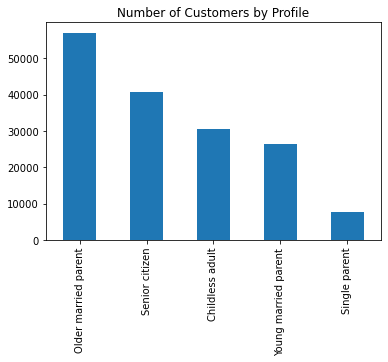

In [150]:
# make a bar graph for the customer profile counts
bar_profile = df_active_user['customer_profile'].value_counts().plot.bar()
plt.title('Number of Customers by Profile')

# 06 Customer Profile Analysis

In [59]:
# mean, min, and max of prices by profile
df_active.groupby('customer_profile').agg({'prices': ['mean', 'min', 'max']})

prices           
                          mean  min   max
customer_profile                         
Childless adult       7.785393  1.0  25.0
Older married parent  7.793771  1.0  25.0
Senior citizen        7.794342  1.0  25.0
Single parent         7.800604  1.0  25.0
Young married parent  7.781142  1.0  25.0

In [151]:
# mean, min, and max of max_order by profile
df_active_user.groupby('customer_profile').agg({'max_order': ['mean', 'min', 'max']})

max_order        
                           mean min max
customer_profile                       
Childless adult       18.877960   5  99
Older married parent  18.813899   5  99
Senior citizen        18.857686   5  99
Single parent         19.110016   5  99
Young married parent  18.769028   5  99

In [145]:
# create a data frame at the order level using the last order for each user
df_active_ord = df_active.drop_duplicates(subset='order_id', keep="last")

In [152]:
# check the shape
df_active_ord.shape

(3064375, 35)

In [153]:
# check the output
df_active_ord.tail(40)

,order_id,user_id,number_of_orders_by_user,orders_day_of_week,order_hour_of_day,days_since_prior_order,is_first_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,busiest_day,price_range_loc,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_price_of_orders,spending_flag,median_of_days_since_prior_order,regularity_flag,gender,state,age,date_joined,number_of_dependents,marital_status,income,_merge,region,low_activity,customer_profile
32404809,774135,11534,12,1,13,7.0,No,42387,1,1,Natural 8 fl oz Alpine Spring Water,115,7,10.5,Regularly busy,Mid-range product,Busiest days,Most orders,12,Regular customer,10.500000,High spender,7.0,Frequent customer,Female,Delaware,69,2/20/2018,0,divorced/widowed,103023,both,South,No,Senior citizen
32404810,1280763,105857,1,1,22,NaN,Yes,23767,1,0,Imported Light Beer,27,5,12.0,Regularly busy,Mid-range product,Busiest days,Average orders,6,New customer,12.000000,High spender,9.0,Frequent customer,Female,Oregon,28,8/28/2019,2,married,48873,both,West,No,Young married parent
32404811,593283,105857,2,6,21,12.0,No,23767,1,1,Imported Light Beer,27,5,12.0,Regularly busy,Mid-range product,Regular days,Average orders,6,New customer,12.000000,High spender,9.0,Frequent customer,Female,Oregon,28,8/28/2019,2,married,48873,both,West,No,Young married parent
32404812,2645685,105857,3,2,22,10.0,No,23767,1,1,Imported Light Beer,27,5,12.0,Regularly busy,Mid-range product,Regular days,Average orders,6,New customer,12.000000,High spender,9.0,Frequent customer,Female,Oregon,28,8/28/2019,2,married,48873,both,West,No,Young married parent
32404813,2934579,105857,4,3,2,8.0,No,23767,1,1,Imported Light Beer,27,5,12.0,Regularly busy,Mid-range product,Slowest days,Fewest orders,6,New customer,12.000000,High spender,9.0,Frequent customer,Female,Oregon,28,8/28/2019,2,married,48873,both,West,No,Young married parent
32404814,1654464,105857,5,3,22,7.0,No,23767,1,1,Imported Light Beer,27,5,12.0,Regularly busy,Mid-range product,Slowest days,Average orders,6,New customer,12.000000,High spender,9.0,Frequent customer,Female,Oregon,28,8/28/2019,2,married,48873,both,West,No,Young married parent
32404815,2494306,105857,6,5,21,9.0,No,23767,1,1,Imported Light Beer,27,5,12.0,Regularly busy,Mid-range product,Regular days,Average orders,6,New customer,12.000000,High spender,9.0,Frequent customer,Female,Oregon,28,8/28/2019,2,married,48873,both,West,No,Young married parent
32404819,968657,120516,1,2,9,NaN,Yes,8566,1,0,"Almond Butter, Smooth/Unsalted",88,13,13.6,Regularly busy,Mid-range product,Regular days,Most orders,7,New customer,13.285714,High spender,18.5,Regular customer,Male,Arizona,19,6/14/2019,0,single,76190,both,West,No,Childless adult
32404820,1715304,120516,2,4,14,16.0,No,8566,1,1,"Almond Butter, Smooth/Unsalted",88,13,13.6,Least busy,Mid-range product,Slowest days,Most orders,7,New customer,13.285714,High spender,18.5,Regular customer,Male,Arizona,19,6/14/2019,0,single,76190,both,West,No,Childless adult
32404821,2830894,120516,3,5,8,22.0,No,8566,1,1,"Almond Butter, Smooth/Unsalted",88,13,13.6,Regularly busy,Mid-range product,Regular days,Average orders,7,New customer,13.285714,High spender,18.5,Regular customer,Male,Arizona,19,6/14/2019,0,single,76190,both,West,No,Childless adult


In [154]:
# mean, min, and max of order_hour_of_day by profile
df_active_ord.groupby('customer_profile').agg({'order_hour_of_day': ['mean', 'min', 'max']})

order_hour_of_day        
                                  mean min max
customer_profile                              
Childless adult              13.438116   0  23
Older married parent         13.438538   0  23
Senior citizen               13.426993   0  23
Single parent                13.412438   0  23
Young married parent         13.413149   0  23

In [155]:
# mean, min, and max of orders_day_of_week by profile
df_active_ord.groupby('customer_profile').agg({'orders_day_of_week': ['mean', 'min', 'max']}) 

orders_day_of_week        
                                   mean min max
customer_profile                               
Childless adult                2.771848   0   6
Older married parent           2.782191   0   6
Senior citizen                 2.783288   0   6
Single parent                  2.782228   0   6
Young married parent           2.768358   0   6

In [157]:
# mean, min, and max of max_order by profile
df_active_user.groupby('customer_profile').agg({'max_order': ['mean', 'min', 'max']})

max_order        
                           mean min max
customer_profile                       
Childless adult       18.877960   5  99
Older married parent  18.813899   5  99
Senior citizen        18.857686   5  99
Single parent         19.110016   5  99
Young married parent  18.769028   5  99

In [158]:
# mean, min, and max of income by profile
df_active_user.groupby('customer_profile').agg({'income': ['mean', 'min', 'max']})

income               
                               mean    min     max
customer_profile                                  
Childless adult        90488.012393  25903  584097
Older married parent  103923.390961  25941  592409
Senior citizen        111072.926194  29001  593901
Single parent          68310.566377  25937  396364
Young married parent   68215.416940  25911  392552

Senior citizens have the highest mean income.

In [160]:
# cross the profiles with the spending flag
pd.crosstab(df_active_user.customer_profile, df_active_user.spending_flag)

spending_flag,High spender,Low spender
customer_profile,,
Childless adult,703,29959
Older married parent,1327,55712
Senior citizen,895,39874
Single parent,169,7439
Young married parent,606,25947


In [161]:
# turn it into a data frame
df3 = pd.crosstab(df_active_user.customer_profile, df_active_user.spending_flag)

In [162]:
# create a column with the ratio of high spenders to low spenders for each profile
df3['high_to_low_spender_ratio'] = (df3['High spender']/df3['Low spender'])

In [163]:
# check the output
df3.head()

spending_flag,High spender,Low spender,high_to_low_spender_ratio
customer_profile,,,
Childless adult,703,29959,0.023465
Older married parent,1327,55712,0.023819
Senior citizen,895,39874,0.022446
Single parent,169,7439,0.022718
Young married parent,606,25947,0.023355


In [164]:
# cross the profiles with the regularity flag
pd.crosstab(df_active_user.customer_profile, df_active_user.regularity_flag)

regularity_flag,Frequent customer,Non-frequent customer,Regular customer
customer_profile,,,
Childless adult,14141,6932,9589
Older married parent,26692,12951,17396
Senior citizen,19133,9081,12555
Single parent,3616,1729,2263
Young married parent,12345,5972,8236


In [165]:
# cross the profiles with the order day of week
pd.crosstab(df_active_ord.customer_profile, df_active_ord.orders_day_of_week)

orders_day_of_week,0,1,2,3,4,5,6
customer_profile,,,,,,,
Childless adult,99803,101370,79470,74119,72626,77317,74101
Older married parent,184857,185411,148073,137973,134253,142030,140476
Senior citizen,133011,132308,105491,98937,95961,102628,100440
Single parent,24969,25355,19927,18492,18282,19453,18899
Young married parent,86584,86814,68573,63918,62409,66028,64017


In [166]:
# cross the profiles with the region
pd.crosstab(df_active_user.customer_profile, df_active_user.region)

region,Midwest,Northeast,South,West
customer_profile,,,,
Childless adult,7233,5426,10213,7790
Older married parent,13545,10138,18948,14408
Senior citizen,9588,7139,13589,10453
Single parent,1840,1226,2604,1938
Young married parent,6170,4652,8839,6892


In [167]:
# display all columns in output
pd.set_option('display.max_columns', None)

In [73]:
# cross the profiles with the departments
pd.crosstab(df_active.customer_profile, df_active.department_id)

department_id,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
customer_profile,,,,,,,,,,,,,,,,,,,,,
Childless adult,396217,6715,213266,1713162,28179,48880,486640,17220,153871,6057,79698,124174,334771,127001,190366,975459,128976,79105,520434,191555,12214
Older married parent,742331,11941,392023,3179990,49615,89573,902692,32444,288294,11763,151390,236609,625268,233907,354004,1803571,247723,146948,966665,349194,22710
Senior citizen,532530,8350,278458,2269085,34691,63227,646414,23751,205473,8336,104671,170773,445174,165491,251940,1291039,176427,100162,688474,250463,15905
Single parent,102993,1815,53684,430539,8379,12394,119107,5338,39542,1633,20201,32344,85845,33198,48477,250207,33349,19381,131310,48119,3317
Young married parent,347660,5590,183397,1486497,23763,41917,417048,14307,134956,5662,68346,110881,291647,111253,167287,856906,113382,64796,459523,164503,10622


In [74]:
df_active['department_id'].value_counts()

4     9079273
16    5177182
19    2766406
7     2571901
1     2121731
13    1782705
3     1120828
15    1012074
20    1003834
9      822136
17     699857
12     674781
14     670850
11     424306
18     410392
6      255991
5      144627
8       93060
21      64768
2       34411
10      33451
Name: department_id, dtype: int64

In [168]:
# cross the profiles with the order hour of day
pd.crosstab(df_active_ord.customer_profile, df_active_ord.order_hour_of_day)

order_hour_of_day,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
customer_profile,,,,,,,,,,,,,,,,,,,,,,,,
Childless adult,3891,2043,1177,867,906,1608,5254,15903,30854,44383,48601,48182,45820,46474,47759,48021,46402,38398,30323,23493,17765,13255,10534,6893
Older married parent,7054,3896,2319,1674,1700,2938,9495,28927,56492,81440,91304,89514,85371,87448,88648,88891,85081,71298,56893,43629,32873,24689,19069,12430
Senior citizen,5022,2728,1710,1228,1238,2249,7069,21259,40485,58743,65233,64085,61289,62386,63450,62863,60852,50990,40904,31422,23203,17509,13727,9132
Single parent,984,587,368,253,273,419,1423,4065,7607,10937,12322,12076,11404,11849,12011,11934,11513,9750,7697,5960,4345,3331,2578,1691
Young married parent,3340,1721,1110,828,792,1340,4512,13481,26519,38307,42651,41713,39772,40556,40981,41280,39480,32566,26114,20212,15155,11316,8926,5671


In [76]:
# cross the profiles with prices
pd.crosstab(df_active.customer_profile, df_active.prices)

prices,1.0,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2.0,2.1,2.2,2.3,2.4,2.5,2.6,2.7,2.8,2.9,3.0,3.1,3.2,3.3,3.4,3.5,3.6,3.7,3.8,3.9,4.0,4.1,4.2,4.3,4.4,4.5,4.6,4.7,4.8,4.9,5.0,5.1,5.2,5.3,5.4,5.5,5.6,5.7,5.8,5.9,6.0,6.1,6.2,6.3,6.4,6.5,6.6,6.7,6.8,6.9,7.0,7.1,7.2,7.3,7.4,7.5,7.6,7.7,7.8,7.9,8.0,8.1,8.2,8.3,8.4,8.5,8.6,8.7,8.8,8.9,9.0,9.1,9.2,9.3,9.4,9.5,9.6,9.7,9.8,9.9,10.0,10.1,10.2,10.3,10.4,10.5,10.6,10.7,10.8,10.9,11.0,11.1,11.2,11.3,11.4,11.5,11.6,11.7,11.8,11.9,12.0,12.1,12.2,12.3,12.4,12.5,12.6,12.7,12.8,12.9,13.0,13.1,13.2,13.3,13.4,13.5,13.6,13.7,13.8,13.9,14.0,14.1,14.2,14.3,14.4,14.5,14.6,14.7,14.8,14.9,15.0,15.1,15.2,15.3,15.4,15.5,15.6,15.7,15.8,15.9,16.0,16.1,16.2,16.3,16.4,16.5,16.6,16.7,16.8,16.9,17.0,17.1,17.2,17.3,17.4,17.5,17.6,17.7,17.8,17.9,18.0,18.1,18.2,18.3,18.4,18.5,18.6,18.7,18.8,18.9,19.0,19.1,19.2,19.3,19.4,19.5,19.6,19.7,19.8,19.9,20.0,20.1,20.2,20.3,20.4,20.5,20.6,20.7,20.8,20.9,21.0,21.1,21.3,21.4,21.5,21.6,21.7,21.8,21.9,22.0,22.1,22.2,22.3,22.4,22.5,22.6,22.7,22.8,22.9,23.0,23.1,23.2,23.3,23.4,23.5,23.6,23.7,23.8,23.9,24.0,24.1,24.2,24.3,24.4,24.5,24.6,24.7,24.8,24.9,25.0
customer_profile,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Childless adult,20803,44271,44496,76793,70583,28169,54325,37855,58114,27878,51486,36998,29084,43679,35086,43942,37495,35329,27514,47317,34938,44838,45957,42761,40721,40297,54788,39730,57243,38718,81423,47542,44475,29467,65080,65941,25540,40716,34534,56984,40760,39855,46579,50964,37609,44247,32832,57562,43673,37516,35657,43260,32140,78485,36794,49997,37446,68360,64667,57279,50390,25508,40400,76252,42102,43372,20464,33595,33691,61021,26951,31988,73688,48882,41191,25489,46679,29449,57502,39108,41338,57926,32346,30341,35688,29457,39350,21769,34213,30225,22738,25344,31158,92678,23897,43307,36023,35071,16034,30134,33076,31041,38896,38772,53857,39778,26590,36964,51616,22817,29681,32207,33844,112132,17385,28233,30940,22164,56655,29014,20860,20691,59727,30284,40513,39005,31103,32321,29057,26441,56109,43373,21826,60768,30425,23510,25097,50485,34289,27492,16958,377,87,1340,170,416,86,875,111,873,188,299,310,44,693,445,714,468,893,929,653,754,227,656,319,96,121,293,209,26,171,1395,2629,0,262,604,1408,1860,741,124,511,531,196,1062,965,90,4934,983,33,127,902,783,14,40,967,193,241,1017,154,219,0,6104,1348,29,15,1889,397,87,149,190,834,210,3319,198,146,434,21,193,595,556,1689,2477,735,60,301,1565,197,2166,373,782,154,2729,519,93,367,291,1453,54,976,2245
Older married parent,38022,81673,85777,142526,131234,51497,99371,72127,107822,50955,96003,69107,53466,80427,64540,82750,70741,66479,51379,88555,64006,83921,84532,80271,74309,73967,100117,74397,103757,70573,150579,91570,81998,54281,119446,122601,48006,74617,64522,106290,76493,76047,83897,94625,69258,83564,61328,107528,80198,69777,64745,82242,59917,146659,69650,94220,68390,127306,118445,105842,93809,46219,74458,137866,77770,80323,37703,63535,61722,115779,50659,58145,134589,93700,76768,46791,84005,55003,107152,73045,75851,107236,60357,57067,66554,55942,74510,40444,65381,56975,42864,46176,55439,172267,44257,78844,68567,63545,30548,54491,61836,55858,70666,71056,101274,75982,49227,68075,95168,42767,54892,60941,63269,210209,33307,50689,58928,41350,103387,53438,37870,39325,112511,58768,76211,72728,57828,61536,53981,48711,103208,79934,39539,111934,56557,43068,46204,93737,62390,52448,33289,833,140,2498,381,769,70,1559,288,1753,405,543,593,65,1347,802,1405,1056,1508,1649,1337,1485,263,1412,634,113,231,763,309,46,319,2600,4908,7,628,1092,2963,3438,1528,167,914,932,313,2178,1711,147,9625,1848,113,305,1977,1262,30,53,1832,297,378,2324,242,336,3,11232,2562,40,13,3547,896,163,193,384,1698,400,6673,482,224,744,29,341,1285,1158,3059,4966,1679,91,675,2857,475,4083,737,1458,305,5470,982,169,758,635,2377,136,1849,4577
Senior citizen,27246,57689,60690,102403,93301,369

# 07 Analysis by Region

In [77]:
# compare the profiles by region
# create a data frame of northeast customers only
df_ne = df_active[df_active['region'] == 'Northeast']

In [78]:
# check the output
df_ne.tail(100)

,order_id,user_id,number_of_orders_by_user,orders_day_of_week,order_hour_of_day,days_since_prior_order,is_first_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,busiest_day,price_range_loc,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_price_of_orders,spending_flag,median_of_days_since_prior_order,regularity_flag,gender,state,age,date_joined,number_of_dependents,marital_status,income,_merge,region,low_activity,customer_profile
32403601,3185547,105998,38,5,22,2.0,No,10602,1,1,Brioche Hamburger Buns,43,3,6.6,Regularly busy,Mid-range product,Regular days,Average orders,49,Loyal customer,6.627451,Low spender,4.0,Frequent customer,Male,Maine,80,6/23/2017,1,married,38106,both,Northeast,No,Senior citizen
32403602,2871729,105998,39,0,11,2.0,No,10602,1,1,Brioche Hamburger Buns,43,3,6.6,Busiest day,Mid-range product,Busiest days,Most orders,49,Loyal customer,6.627451,Low spender,4.0,Frequent customer,Male,Maine,80,6/23/2017,1,married,38106,both,Northeast,No,Senior citizen
32403603,2000141,105998,40,2,14,2.0,No,10602,1,1,Brioche Hamburger Buns,43,3,6.6,Regularly busy,Mid-range product,Regular days,Most orders,49,Loyal customer,6.627451,Low spender,4.0,Frequent customer,Male,Maine,80,6/23/2017,1,married,38106,both,Northeast,No,Senior citizen
32403604,2313162,105998,41,1,15,6.0,No,10602,1,1,Brioche Hamburger Buns,43,3,6.6,Regularly busy,Mid-range product,Busiest days,Most orders,49,Loyal customer,6.627451,Low spender,4.0,Frequent customer,Male,Maine,80,6/23/2017,1,married,38106,both,Northeast,No,Senior citizen
32403605,1764671,105998,42,5,17,4.0,No,10602,1,1,Brioche Hamburger Buns,43,3,6.6,Regularly busy,Mid-range product,Regular days,Most orders,49,Loyal customer,6.627451,Low spender,4.0,Frequent customer,Male,Maine,80,6/23/2017,1,married,38106,both,Northeast,No,Senior citizen
32403606,2094204,105998,43,1,22,3.0,No,10602,1,1,Brioche Hamburger Buns,43,3,6.6,Regularly busy,Mid-range product,Busiest days,Average orders,49,Loyal customer,6.627451,Low spender,4.0,Frequent customer,Male,Maine,80,6/23/2017,1,married,38106,both,Northeast,No,Senior citizen
32403607,2181733,105998,44,5,13,4.0,No,10602,1,1,Brioche Hamburger Buns,43,3,6.6,Regularly busy,Mid-range product,Regular days,Most orders,49,Loyal customer,6.627451,Low spender,4.0,Frequent customer,Male,Maine,80,6/23/2017,1,married,38106,both,Northeast,No,Senior citizen
32403608,581697,105998,45,2,18,4.0,No,10602,1,1,Brioche Hamburger Buns,43,3,6.6,Regularly busy,Mid-range product,Regular days,Average orders,49,Loyal customer,6.627451,Low spender,4.0,Frequent customer,Male,Maine,80,6/23/2017,1,married,38106,both,Northeast,No,Senior citizen
32403609,1134787,105998,46,3,23,1.0,No,10602,1,1,Brioche Hamburger Buns,43,3,6.6,Regularly busy,Mid-range product,Slowest days,Average orders,49,Loyal customer,6.627451,Low spender,4.0,Frequent customer,Male,Maine,80,6/23/2017,1,married,38106,both,Northeast,No,Senior citizen
32403610,1702250,105998,47,5,17,2.0,No,10602,1,1,Brioche Hamburger Buns,43,3,6.6,Regularly busy,Mid-range product,Regular days,Most orders,49,Loyal customer,6.627451,Low spender,4.0,Frequent customer,Male,Maine,80,6/23/2017,1,married,38106,both,Northeast,No,Senior citizen


Text(0.5, 1.0, 'Number of Items Ordered by Profile in the Northeast')

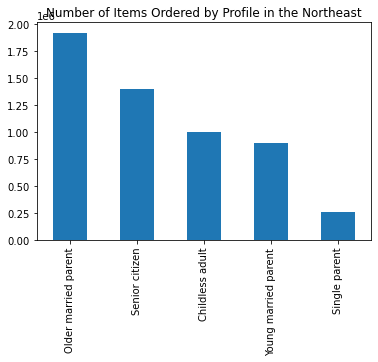

In [174]:
# make a bar graph for the customer profile counts in the Northeast
bar_profile_ne = df_ne['customer_profile'].value_counts().plot.bar()
plt.title('Number of Items Ordered by Profile in the Northeast')

In [80]:
# check which departments are the most popular in the Northeast
df_ne['department_id'].value_counts(dropna = False)

4     1593004
16     914616
19     493154
7      462929
1      370436
13     312731
3      199300
20     178398
15     176936
9      143817
17     124604
12     118571
14     117904
11      74765
18      72712
6       44678
5       25017
8       17734
21      11512
2        6268
10       5599
Name: department_id, dtype: int64

Text(0.5, 1.0, 'Number of Items Ordered by Department in the Northeast')

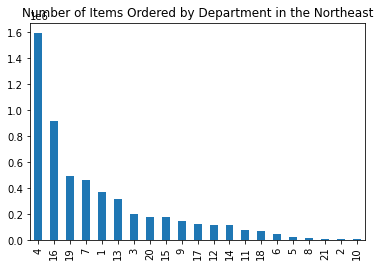

In [170]:
# create a bar chart for the departments in the Northeast
bar_dept_ne = df_ne['department_id'].value_counts().plot.bar()
plt.title('Number of Items Ordered by Department in the Northeast')

In [82]:
# create a data frame of Midwest customers only
df_mw = df_active[df_active['region'] == 'Midwest']

In [83]:
# check the output
df_mw.tail(100)

,order_id,user_id,number_of_orders_by_user,orders_day_of_week,order_hour_of_day,days_since_prior_order,is_first_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,busiest_day,price_range_loc,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_price_of_orders,spending_flag,median_of_days_since_prior_order,regularity_flag,gender,state,age,date_joined,number_of_dependents,marital_status,income,_merge,region,low_activity,customer_profile
32404346,2812855,32501,6,3,15,30.0,No,33344,1,1,Powder Laxative,47,11,7.6,Regularly busy,Mid-range product,Slowest days,Most orders,6,New customer,8.057143,Low spender,14.0,Regular customer,Male,Illinois,63,5/29/2017,0,divorced/widowed,146204,both,Midwest,No,Childless adult
32404347,1342717,32501,2,5,13,14.0,No,43163,1,0,Laxative Tablets,70,11,9.2,Regularly busy,Mid-range product,Regular days,Most orders,6,New customer,8.057143,Low spender,14.0,Regular customer,Male,Illinois,63,5/29/2017,0,divorced/widowed,146204,both,Midwest,No,Childless adult
32404348,3301675,32501,5,5,16,5.0,No,43163,1,1,Laxative Tablets,70,11,9.2,Regularly busy,Mid-range product,Regular days,Most orders,6,New customer,8.057143,Low spender,14.0,Regular customer,Male,Illinois,63,5/29/2017,0,divorced/widowed,146204,both,Midwest,No,Childless adult
32404359,3398224,163388,1,6,12,NaN,Yes,1560,1,0,Bag Of Ice,37,1,13.4,Regularly busy,Mid-range product,Regular days,Most orders,23,Regular customer,13.400000,High spender,5.0,Frequent customer,Male,Michigan,75,2/21/2017,3,married,94279,both,Midwest,No,Senior citizen
32404360,2167366,163388,2,6,20,0.0,No,1560,1,1,Bag Of Ice,37,1,13.4,Regularly busy,Mid-range product,Regular days,Average orders,23,Regular customer,13.400000,High spender,5.0,Frequent customer,Male,Michigan,75,2/21/2017,3,married,94279,both,Midwest,No,Senior citizen
32404361,3220329,163388,3,5,8,6.0,No,1560,1,1,Bag Of Ice,37,1,13.4,Regularly busy,Mid-range product,Regular days,Average orders,23,Regular customer,13.400000,High spender,5.0,Frequent customer,Male,Michigan,75,2/21/2017,3,married,94279,both,Midwest,No,Senior citizen
32404362,1907972,163388,4,5,8,0.0,No,1560,1,1,Bag Of Ice,37,1,13.4,Regularly busy,Mid-range product,Regular days,Average orders,23,Regular customer,13.400000,High spender,5.0,Frequent customer,Male,Michigan,75,2/21/2017,3,married,94279,both,Midwest,No,Senior citizen
32404363,1018065,163388,5,4,22,6.0,No,1560,1,1,Bag Of Ice,37,1,13.4,Least busy,Mid-range product,Slowest days,Average orders,23,Regular customer,13.400000,High spender,5.0,Frequent customer,Male,Michigan,75,2/21/2017,3,married,94279,both,Midwest,No,Senior citizen
32404364,2083707,163388,6,4,22,0.0,No,1560,1,1,Bag Of Ice,37,1,13.4,Least busy,Mid-range product,Slowest days,Average orders,23,Regular customer,13.400000,High spender,5.0,Frequent customer,Male,Michigan,75,2/21/2017,3,married,94279,both,Midwest,No,Senior citizen
32404365,953913,163388,7,3,11,6.0,No,1560,1,1,Bag Of Ice,37,1,13.4,Regularly busy,Mid-range product,Slowest days,Most orders,23,Regular customer,13.400000,High spender,5.0,Frequent customer,Male,Michigan,75,2/21/2017,3,married,94279,both,Midwest,No,Senior citizen


Text(0.5, 1.0, 'Number of Items Ordered by Profile in the Midwest')

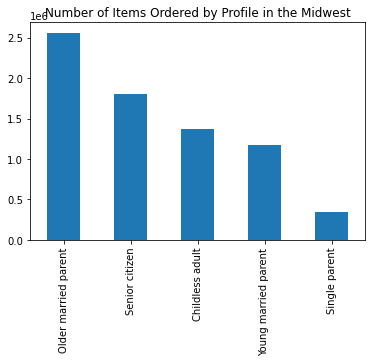

In [173]:
# make a bar graph for the customer profile counts in the Midwest
bar_profile_mw = df_mw['customer_profile'].value_counts().plot.bar()
plt.title('Number of Items Ordered by Profile in the Midwest')

In [85]:
# check which departments are the most popular in the Midwest
df_mw['department_id'].value_counts(dropna = False)

4     2134115
16    1212490
19     645143
7      598979
1      498225
13     420334
3      261753
15     237459
20     234464
9      193463
17     166992
12     158260
14     156155
11     100398
18      95741
6       60666
5       34043
8       21358
21      15563
2        7983
10       7929
Name: department_id, dtype: int64

Text(0.5, 1.0, 'Number of Items Ordered by Department in the Midwest')

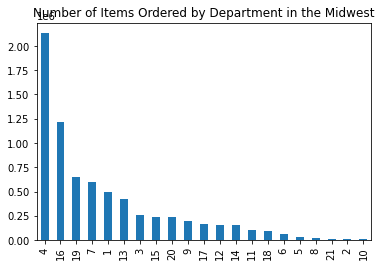

In [172]:
# create a bar chart for the departments in the Midwest
bar_dept_mw = df_mw['department_id'].value_counts().plot.bar()
plt.title('Number of Items Ordered by Department in the Midwest')

In [87]:
# create a data frame of Southern customers only
df_s = df_active[df_active['region'] == 'South']

In [88]:
# check the output
df_s.tail(100)

,order_id,user_id,number_of_orders_by_user,orders_day_of_week,order_hour_of_day,days_since_prior_order,is_first_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,busiest_day,price_range_loc,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_price_of_orders,spending_flag,median_of_days_since_prior_order,regularity_flag,gender,state,age,date_joined,number_of_dependents,marital_status,income,_merge,region,low_activity,customer_profile
32404442,1751525,95228,1,0,20,NaN,Yes,47713,1,0,Sparkling Rose,134,5,6.0,Busiest day,Mid-range product,Busiest days,Average orders,7,New customer,6.385714,Low spender,9.5,Frequent customer,Female,Georgia,37,1/22/2017,2,married,41188,both,South,No,Older married parent
32404443,77392,95228,2,6,17,6.0,No,47713,1,1,Sparkling Rose,134,5,6.0,Regularly busy,Mid-range product,Regular days,Most orders,7,New customer,6.385714,Low spender,9.5,Frequent customer,Female,Georgia,37,1/22/2017,2,married,41188,both,South,No,Older married parent
32404444,1264096,95228,3,3,19,11.0,No,47713,1,1,Sparkling Rose,134,5,6.0,Regularly busy,Mid-range product,Slowest days,Average orders,7,New customer,6.385714,Low spender,9.5,Frequent customer,Female,Georgia,37,1/22/2017,2,married,41188,both,South,No,Older married parent
32404445,679020,95228,4,5,8,9.0,No,47713,1,1,Sparkling Rose,134,5,6.0,Regularly busy,Mid-range product,Regular days,Average orders,7,New customer,6.385714,Low spender,9.5,Frequent customer,Female,Georgia,37,1/22/2017,2,married,41188,both,South,No,Older married parent
32404507,2013165,56006,1,3,19,NaN,Yes,5351,1,0,Smoked Whitefish Salad,1,20,11.7,Regularly busy,Mid-range product,Slowest days,Average orders,7,New customer,10.228571,High spender,25.0,Non-frequent customer,Female,Delaware,69,2/29/2020,0,divorced/widowed,169200,both,South,No,Senior citizen
32404508,528985,56006,2,4,17,30.0,No,5351,1,1,Smoked Whitefish Salad,1,20,11.7,Least busy,Mid-range product,Slowest days,Most orders,7,New customer,10.228571,High spender,25.0,Non-frequent customer,Female,Delaware,69,2/29/2020,0,divorced/widowed,169200,both,South,No,Senior citizen
32404509,2370935,56006,4,4,6,30.0,No,5351,1,1,Smoked Whitefish Salad,1,20,11.7,Least busy,Mid-range product,Slowest days,Fewest orders,7,New customer,10.228571,High spender,25.0,Non-frequent customer,Female,Delaware,69,2/29/2020,0,divorced/widowed,169200,both,South,No,Senior citizen
32404510,2831085,56006,5,3,13,30.0,No,5351,1,1,Smoked Whitefish Salad,1,20,11.7,Regularly busy,Mid-range product,Slowest days,Most orders,7,New customer,10.228571,High spender,25.0,Non-frequent customer,Female,Delaware,69,2/29/2020,0,divorced/widowed,169200,both,South,No,Senior citizen
32404511,1497279,56006,6,4,14,1.0,No,5351,1,1,Smoked Whitefish Salad,1,20,11.7,Least busy,Mid-range product,Slowest days,Most orders,7,New customer,10.228571,High spender,25.0,Non-frequent customer,Female,Delaware,69,2/29/2020,0,divorced/widowed,169200,both,South,No,Senior citizen
32404512,1040341,56006,7,3,10,20.0,No,5351,1,1,Smoked Whitefish Salad,1,20,11.7,Regularly busy,Mid-range product,Slowest days,Most orders,7,New customer,10.228571,High spender,25.0,Non-frequent customer,Female,Delaware,69,2/29/2020,0,divorced/widowed,169200,both,South,No,Senior citizen


Text(0.5, 1.0, 'Number of Items Ordered by Profile in the South')

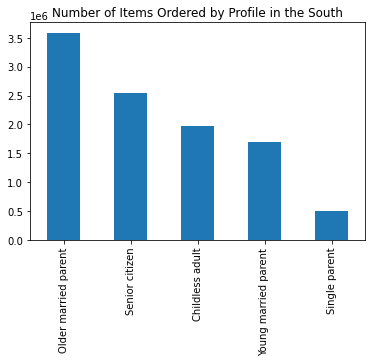

In [175]:
# make a bar graph for the customer profile counts in the South
bar_profile_s = df_s['customer_profile'].value_counts().plot.bar()
plt.title('Number of Items Ordered by Profile in the South')

In [90]:
# check which departments are the most popular in the South
df_s['department_id'].value_counts(dropna = False)

4     3027476
16    1723016
19     916780
7      859419
1      709906
13     591754
3      371620
15     337458
20     333620
9      272813
17     230061
12     224120
14     223172
11     142496
18     139511
6       84649
5       48813
8       29909
21      21787
2       11579
10      11180
Name: department_id, dtype: int64

Text(0.5, 1.0, 'Number of Items Ordered by Department in the South')

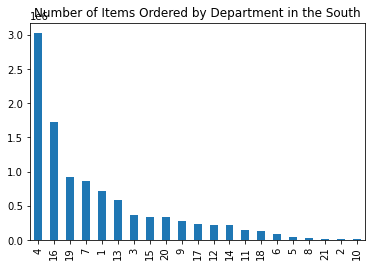

In [176]:
# create a bar chart for the departments in the South
bar_dept_s = df_s['department_id'].value_counts().plot.bar()
plt.title('Number of Items Ordered by Department in the South')

In [92]:
# create a data frame of Western customers only
df_w = df_active[df_active['region'] == 'West']

In [93]:
# check the output
df_w.tail(100)

,order_id,user_id,number_of_orders_by_user,orders_day_of_week,order_hour_of_day,days_since_prior_order,is_first_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,busiest_day,price_range_loc,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_price_of_orders,spending_flag,median_of_days_since_prior_order,regularity_flag,gender,state,age,date_joined,number_of_dependents,marital_status,income,_merge,region,low_activity,customer_profile
32404084,1080052,66785,7,1,13,30.0,No,43739,1,1,Variety Diet Tea,94,7,13.9,Regularly busy,Mid-range product,Busiest days,Most orders,7,New customer,17.620000,High spender,29.0,Non-frequent customer,Male,New Mexico,72,3/16/2020,3,married,92259,both,West,No,Senior citizen
32404177,1687704,148830,1,5,23,NaN,Yes,13042,1,0,with Crispy Almonds Cereal,121,14,13.2,Regularly busy,Mid-range product,Regular days,Average orders,9,New customer,13.200000,High spender,29.0,Non-frequent customer,Male,Hawaii,47,11/21/2018,0,single,114701,both,West,No,Childless adult
32404178,3087933,148830,2,4,21,20.0,No,13042,1,1,with Crispy Almonds Cereal,121,14,13.2,Least busy,Mid-range product,Slowest days,Average orders,9,New customer,13.200000,High spender,29.0,Non-frequent customer,Male,Hawaii,47,11/21/2018,0,single,114701,both,West,No,Childless adult
32404179,1190896,148830,3,6,10,30.0,No,13042,1,1,with Crispy Almonds Cereal,121,14,13.2,Regularly busy,Mid-range product,Regular days,Most orders,9,New customer,13.200000,High spender,29.0,Non-frequent customer,Male,Hawaii,47,11/21/2018,0,single,114701,both,West,No,Childless adult
32404180,1439654,148830,4,6,17,28.0,No,13042,1,1,with Crispy Almonds Cereal,121,14,13.2,Regularly busy,Mid-range product,Regular days,Most orders,9,New customer,13.200000,High spender,29.0,Non-frequent customer,Male,Hawaii,47,11/21/2018,0,single,114701,both,West,No,Childless adult
32404181,697427,148830,5,4,7,30.0,No,13042,1,1,with Crispy Almonds Cereal,121,14,13.2,Least busy,Mid-range product,Slowest days,Average orders,9,New customer,13.200000,High spender,29.0,Non-frequent customer,Male,Hawaii,47,11/21/2018,0,single,114701,both,West,No,Childless adult
32404182,344729,148830,6,4,7,28.0,No,13042,1,1,with Crispy Almonds Cereal,121,14,13.2,Least busy,Mid-range product,Slowest days,Average orders,9,New customer,13.200000,High spender,29.0,Non-frequent customer,Male,Hawaii,47,11/21/2018,0,single,114701,both,West,No,Childless adult
32404183,1229174,148830,7,0,13,30.0,No,13042,1,1,with Crispy Almonds Cereal,121,14,13.2,Busiest day,Mid-range product,Busiest days,Most orders,9,New customer,13.200000,High spender,29.0,Non-frequent customer,Male,Hawaii,47,11/21/2018,0,single,114701,both,West,No,Childless adult
32404184,560894,148830,8,3,20,17.0,No,13042,1,1,with Crispy Almonds Cereal,121,14,13.2,Regularly busy,Mid-range product,Slowest days,Average orders,9,New customer,13.200000,High spender,29.0,Non-frequent customer,Male,Hawaii,47,11/21/2018,0,single,114701,both,West,No,Childless adult
32404185,1839650,148830,9,4,19,30.0,No,13042,1,1,with Crispy Almonds Cereal,121,14,13.2,Least busy,Mid-range product,Slowest days,Average orders,9,New customer,13.200000,High spender,29.0,Non-frequent customer,Male,Hawaii,47,11/21/2018,0,single,114701,both,West,No,Childless adult


Text(0.5, 1.0, 'Number of Items Ordered by Profile in the West')

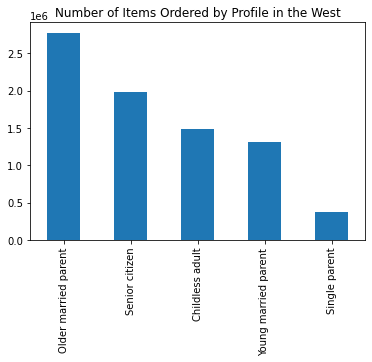

In [178]:
# make a bar graph for the customer profile counts in the West
bar_profile_w = df_w['customer_profile'].value_counts().plot.bar()
plt.title("Number of Items Ordered by Profile in the West")

In [95]:
# check which departments are the most popular in the West
df_w['department_id'].value_counts(dropna = False)

4     2324678
16    1327060
19     711329
7      650574
1      543164
13     457886
3      288155
15     260221
20     257352
9      212043
17     178200
12     173830
14     173619
11     106647
18     102428
6       65998
5       36754
8       24059
21      15906
10       8743
2        8581
Name: department_id, dtype: int64

Text(0.5, 1.0, 'Number of Items Ordered by Department in the West')

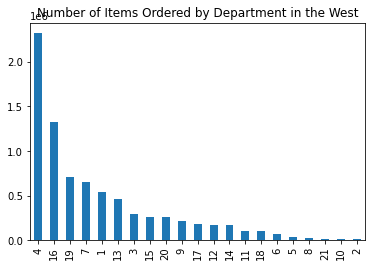

In [179]:
# create a bar chart for the departments in the West
bar_dept_w = df_w['department_id'].value_counts().plot.bar()
plt.title('Number of Items Ordered by Department in the West')

In [180]:
# cross the region with the spending flag
pd.crosstab(df_active_user.region, df_active_user.spending_flag)

spending_flag,High spender,Low spender
region,,
Midwest,883,37493
Northeast,613,27968
South,1258,52935
West,946,40535


In [181]:
# cross the region with the regularity flag
pd.crosstab(df_active_user.region, df_active_user.regularity_flag)

regularity_flag,Frequent customer,Non-frequent customer,Regular customer
region,,,
Midwest,17794,8743,11839
Northeast,13345,6325,8911
South,25314,12277,16602
West,19474,9320,12687


In [99]:
# cross the region with the prices
pd.crosstab(df_active.region, df_active.prices)

prices,1.0,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2.0,2.1,2.2,2.3,2.4,2.5,2.6,2.7,2.8,2.9,3.0,3.1,3.2,3.3,3.4,3.5,3.6,3.7,3.8,3.9,4.0,4.1,4.2,4.3,4.4,4.5,4.6,4.7,4.8,4.9,5.0,5.1,5.2,5.3,5.4,5.5,5.6,5.7,5.8,5.9,6.0,6.1,6.2,6.3,6.4,6.5,6.6,6.7,6.8,6.9,7.0,7.1,7.2,7.3,7.4,7.5,7.6,7.7,7.8,7.9,8.0,8.1,8.2,8.3,8.4,8.5,8.6,8.7,8.8,8.9,9.0,9.1,9.2,9.3,9.4,9.5,9.6,9.7,9.8,9.9,10.0,10.1,10.2,10.3,10.4,10.5,10.6,10.7,10.8,10.9,11.0,11.1,11.2,11.3,11.4,11.5,11.6,11.7,11.8,11.9,12.0,12.1,12.2,12.3,12.4,12.5,12.6,12.7,12.8,12.9,13.0,13.1,13.2,13.3,13.4,13.5,13.6,13.7,13.8,13.9,14.0,14.1,14.2,14.3,14.4,14.5,14.6,14.7,14.8,14.9,15.0,15.1,15.2,15.3,15.4,15.5,15.6,15.7,15.8,15.9,16.0,16.1,16.2,16.3,16.4,16.5,16.6,16.7,16.8,16.9,17.0,17.1,17.2,17.3,17.4,17.5,17.6,17.7,17.8,17.9,18.0,18.1,18.2,18.3,18.4,18.5,18.6,18.7,18.8,18.9,19.0,19.1,19.2,19.3,19.4,19.5,19.6,19.7,19.8,19.9,20.0,20.1,20.2,20.3,20.4,20.5,20.6,20.7,20.8,20.9,21.0,21.1,21.3,21.4,21.5,21.6,21.7,21.8,21.9,22.0,22.1,22.2,22.3,22.4,22.5,22.6,22.7,22.8,22.9,23.0,23.1,23.2,23.3,23.4,23.5,23.6,23.7,23.8,23.9,24.0,24.1,24.2,24.3,24.4,24.5,24.6,24.7,24.8,24.9,25.0
region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Midwest,26027,54703,56953,95097,87782,35083,67388,47517,72468,34609,63858,46089,35659,53469,43111,55278,47962,44440,34256,59527,43275,56062,56508,53748,50167,50689,67113,49713,70144,47184,99536,61054,55282,35911,79990,81601,32524,50369,42999,71477,50463,50958,57033,63298,47855,55662,40929,72365,53821,46213,44178,55035,39619,97699,45987,62794,46387,84818,79012,70621,61492,31750,50148,92988,51411,54019,25492,42943,42421,77131,33929,38913,89514,62338,51610,31646,57080,36593,71221,49434,50373,72810,41381,38376,44249,37246,49176,26848,43432,38019,28657,31351,36747,115668,28990,53241,45298,43899,20051,36572,41007,38204,48276,47875,68504,50981,33848,45926,63604,28655,37427,40730,41910,140214,21714,33440,39004,27602,69109,35538,25775,25455,74576,38650,50586,47994,39066,40672,36823,32452,71003,52949,26494,75446,38083,28739,31454,63109,42316,35093,22104,543,113,1842,238,499,80,1031,156,1015,294,339,476,77,788,553,1012,775,1266,1079,894,1010,255,863,433,99,141,435,254,28,258,1970,3195,5,346,817,1859,2322,1096,155,540,721,258,1404,1216,88,6386,1283,50,173,1363,763,34,55,1128,190,246,1588,220,229,3,7373,1764,43,13,2412,552,120,124,252,1222,263,4396,288,131,493,17,331,849,723,1927,3081,1121,72,432,1640,328,2745,435,995,208,3569,588,109,470,485,1418,78,1433,3024
Northeast,19609,41866,42368,71121,66797,25794,50060,37107,54198,26759,48882,35187,27205,41246,33616,41535,35365,34205,26202,44372,32179,42170,42720,40308,37334,37056,50644,38165,53054,36429,76470,44849,41268,27753,59929,62861,24368,37509,32044,53727,38029,37712,42421,48258,34623,42138,30631,55459,40585,35559,33754,40834,30546,75016,34764,46207,34320,63850,59402,53022,47805,23665,37046,70255,39667,40712,18723,32289,31474,58219,24596,29993,68223,46304,38585,23304,42690,28017,54640,36955,38616,53452,31807,28386,32552,28331,36646,20231,32048,28146,21715,23279,28260,86778,22084,39199,33971,31145,15260,27576,31236,28218,35928,35714,50979,37585,25493,34698,47867,20940,27076,30360,32116,105390,16440,25649,29629,20917,53057,26919,19101,20000,56075,29649,38592,36324,28858,30680,25580,24862,52671,40001,20103,56730,28451,21548,23785,46759,31776,26650,16442,321,38,1310,194,386,59,738,118,815,225,258,318,30,686,485,680,453,815,863,639,697,190,633,317,54,114,349,162,25,189,1308,2608,1,294,490,1433,1743,662,64,407,503,138,1091,867,81,4775,973,67,136,993,574,11,30,912,135,194,1126,175,161,0,5891,1323,12,7,1835,448,70,137,177,880,196,3100,207,111,327,8,131,639,572,1611,2526,825,79,282,1359,226,2054,299,756,141,2656,591,57,353,304,1314,59,837,2416
South,36039,76837,81323,136547,124779,49236,94322,68086,102824,48983,90910,65490,51068,76584,62634,78134,67608,63304,49

In [182]:
# cross the region with the profiles
pd.crosstab(df_active_user.region, df_active_user.customer_profile)

customer_profile,Childless adult,Older married parent,Senior citizen,Single parent,Young married parent
region,,,,,
Midwest,7233,13545,9588,1840,6170
Northeast,5426,10138,7139,1226,4652
South,10213,18948,13589,2604,8839
West,7790,14408,10453,1938,6892


# 08 Ordering Habits Analysis

In [183]:
# cross the loyalty status with the region
pd.crosstab(df_active_user.loyalty_flag, df_active_user.region)

region,Midwest,Northeast,South,West
loyalty_flag,,,,
Loyal customer,3991,3027,5637,4362
New customer,16190,12062,22947,17551
Regular customer,18195,13492,25609,19568


In [184]:
# cross the loyalty status with the profile
pd.crosstab(df_active_user.loyalty_flag, df_active_user.customer_profile)

customer_profile,Childless adult,Older married parent,Senior citizen,Single parent,Young married parent
loyalty_flag,,,,,
Loyal customer,3220,5939,4312,810,2736
New customer,13007,24175,17128,3162,11278
Regular customer,14435,26925,19329,3636,12539


In [185]:
# cross the loyalty status with the gender
pd.crosstab(df_active_user.loyalty_flag, df_active_user.gender)

gender,Female,Male
loyalty_flag,,
Loyal customer,8338,8679
New customer,34071,34679
Regular customer,38224,38640


In [186]:
# cross the loyalty status with the marital status
pd.crosstab(df_active_user.loyalty_flag, df_active_user.marital_status)

marital_status,divorced/widowed,living with parents and siblings,married,single
loyalty_flag,,,,
Loyal customer,1452,810,11940,2815
New customer,5781,3162,48332,11475
Regular customer,6598,3636,54024,12606


In [105]:
# cross the loyalty status with the day
pd.crosstab(df_active.loyalty_flag, df_active.orders_day_of_week)

orders_day_of_week,0,1,2,3,4,5,6
loyalty_flag,,,,,,,
Loyal customer,1754731,1843401,1352343,1266495,1292042,1456715,1318366
New customer,984879,818902,625288,560418,535931,587718,690559
Regular customer,3169000,2749383,2047075,1842622,1797021,1989296,2282379


In [106]:
df_active['age'].value_counts().sort_index()

18    478457
19    496077
20    480194
21    489116
22    490811
23    492931
24    487608
25    449324
26    489892
27    501071
28    464831
29    497291
30    486637
31    506218
32    474676
33    472331
34    484830
35    496510
36    460649
37    487618
38    492790
39    485248
40    483323
41    451269
42    485081
43    499729
44    494457
45    488088
46    472571
47    494052
48    506730
49    507879
50    468776
51    492218
52    480429
53    479004
54    497817
55    489733
56    499580
57    473657
58    479842
59    480715
60    461897
61    463615
62    473859
63    474757
64    504832
65    464710
66    454604
67    472533
68    501319
69    489495
70    480234
71    463515
72    479884
73    499453
74    477168
75    499229
76    477348
77    477999
78    471119
79    508337
80    492750
81    485847
Name: age, dtype: int64

In [187]:
# cross the loyalty status with the age
pd.crosstab(df_active_user.loyalty_flag, df_active_user.age)

age,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81
loyalty_flag,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Loyal customer,246,271,256,282,295,280,241,234,248,257,251,274,258,288,258,247,268,252,241,268,274,263,254,260,272,280,283,269,254,269,299,274,263,281,277,258,260,268,275,273,272,268,260,252,268,242,283,239,263,279,261,286,262,248,259,295,259,285,252,247,253,289,314,260
New customer,1081,1077,1081,1032,1055,1075,1115,1034,1092,1057,1095,1058,1153,1052,1133,1066,1067,1074,985,1096,1042,1017,1081,1094,1057,1108,1104,1105,1077,1107,1050,1076,1088,1110,1062,1087,1091,1107,1132,1072,1073,1056,1044,1004,1076,1101,1059,1064,1080,1070,1062,1056,1062,1014,1049,1053,1111,1145,1074,1108,1075,1079,1013,1077
Regular customer,1178,1239,1227,1166,1185,1166,1218,1163,1228,1183,1193,1243,1219,1191,1198,1202,1175,1212,1177,1209,1189,1210,1193,1119,1183,1196,1244,1234,1250,1235,1228,1242,1119,1251,1164,1185,1238,1272,1216,1121,1140,1222,1180,1136,1183,1229,1206,1178,1110,1190,1260,1173,1175,1207,1251,1219,1218,1176,1270,1244,1206,1219,1191,1220


Text(0.5, 1.0, 'Customer Loyalty Counts')

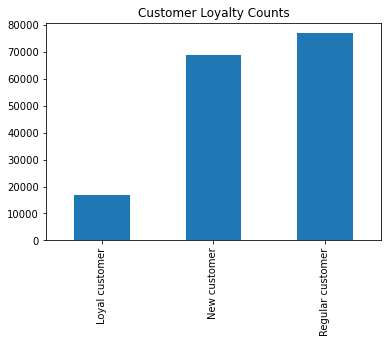

In [202]:
bar_loyalty_active = df_active_user['loyalty_flag'].value_counts().sort_index().plot.bar()
plt.title('Customer Loyalty Counts')

Text(0.5, 1.0, 'Number of Items Ordered by Department')

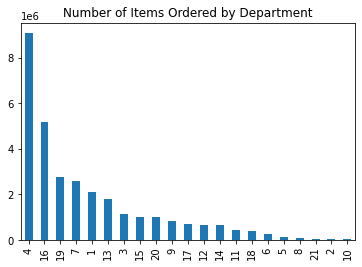

In [207]:
bar_dept_general = df_active['department_id'].value_counts().plot.bar()
plt.title('Number of Items Ordered by Department')

# 09 Exports

In [108]:
# export the data frame
df_active.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'active.pkl'))

In [188]:
# export the data frame
df_active_user.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'active_user.pkl'))

In [189]:
# export the data frame
df_active_ord.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'active_ord.pkl'))

In [190]:
# export visualization 1
bar_region_count.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_region_count.png'),bbox_inches = 'tight')

In [191]:
# export visualization 2
bar_ratio.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_ratio_high_low_spend.png'),bbox_inches = 'tight')

In [192]:
# export visualization 3
bar_profile.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_profile.png'),bbox_inches = 'tight')

In [193]:
# export visualization 4
bar_profile_ne.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_profile_ne.png'),bbox_inches = 'tight')

In [194]:
# export visualization 5
bar_dept_ne.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_dept_ne.png'),bbox_inches = 'tight')

In [195]:
# export visualization 6
bar_profile_mw.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_profile_mw.png'),bbox_inches = 'tight')

In [196]:
# export visualization 7
bar_dept_mw.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_dept_mw.png'),bbox_inches = 'tight')

In [197]:
# export visualization 8
bar_profile_s.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_profile_s.png'),bbox_inches = 'tight')

In [198]:
# export visualization 9
bar_dept_s.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_dept_s.png'),bbox_inches = 'tight')

In [199]:
# export visualization 10
bar_profile_w.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_profile_w.png'),bbox_inches="tight")

In [200]:
# export visualization 11
bar_dept_w.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_dept_w.png'),bbox_inches = 'tight')

In [203]:
# export visualization 12
bar_loyalty_active.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyalty_active.png'),bbox_inches = 'tight')

In [208]:
# export visualization 13
bar_dept_general.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_dept_general.png'),bbox_inches = 'tight')